In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, pareto, uniform
from time import perf_counter
import math
import hashlib
from scipy.signal import convolve2d
from sklearn.linear_model import LogisticRegression as LR

# Exploratory Data Analysis: Predicting Restaurant Prices and Michelin Stars

In the EDA section, we will visualize the cleaned and feature engineered data for the Michelin's Guide to restaurants around the world. We will begin by importing the cleaned dataset.

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,name,latitude,longitude,zipCode,url,stars,city_Aarhus,city_Aird Mhór/Ardmore,city_Anstruther,city_Ascot,...,cuisine_modern,price_$,price_$$,price_$$$,price_$$$$,price_$$$$$,city,region,cuisine,price
0,Kilian Stuba,47.348580,10.17114,87568,https://guide.michelin.com/at/en/vorarlberg/kl...,1.0,0,0,0,0,...,0,0,0,0,0,1,Kleinwalsertal,Austria,Creative,5.0
1,Pfefferschiff,47.837870,13.07917,5300,https://guide.michelin.com/at/en/salzburg-regi...,1.0,0,0,0,0,...,0,0,0,0,0,1,Hallwang,Austria,Classic cuisine,5.0
2,Esszimmer,47.806850,13.03409,5020,https://guide.michelin.com/at/en/salzburg-regi...,1.0,0,0,0,0,...,0,0,0,0,0,1,Salzburg,Austria,Creative,5.0
3,Carpe Diem,47.800010,13.04006,5020,https://guide.michelin.com/at/en/salzburg-regi...,1.0,0,0,0,0,...,0,0,0,0,0,1,Salzburg,Austria,Market cuisine,5.0
4,Edvard,48.216503,16.36852,1010,https://guide.michelin.com/at/en/vienna/wien/r...,1.0,0,0,0,0,...,0,0,0,0,1,0,Wien,Austria,Modern cuisine,4.0


In [3]:
df.shape
#695 restaurants, 288 columns/descriptors
print("There are " + str(len(df["city"].unique())) + " unique cities.")
print("There are " + str(len(df["name"].unique())) + " unique restaurants.")
print("There are " + str(len(df["region"].unique())) + " unique regions.")
print("There are " + str(len(df["cuisine"].unique())) + " unique cuisines.")

There are 180 unique cities.
There are 684 unique restaurants.
There are 24 unique regions.
There are 70 unique cuisines.


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

4 dollar sign restaurants had the most 3 michelin-starred restaurants while 3 dollar sign restaurants had the most 1 michelin-starred restaurants.


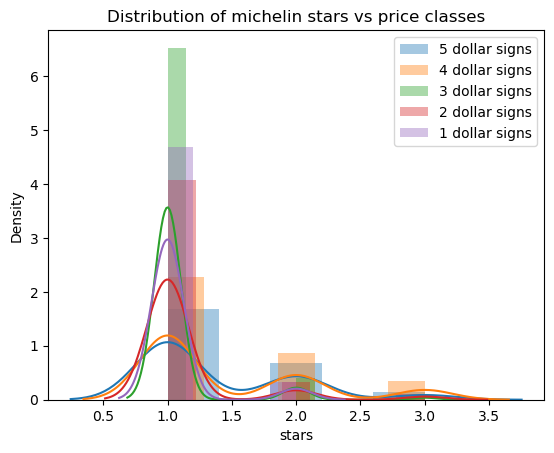

In [13]:
fig, ax = plt.subplots()
sns.distplot(df[(df.price == 5.0)]["stars"], ax=ax, label="5 dollar signs")
sns.distplot(df[(df.price == 4.0)]["stars"], ax=ax, label="4 dollar signs")
sns.distplot(df[(df.price == 3.0)]["stars"], ax=ax, label="3 dollar signs")
sns.distplot(df[(df.price == 2.0)]["stars"], ax=ax, label="2 dollar signs")
sns.distplot(df[(df.price == 1.0)]["stars"], ax=ax, label="1 dollar signs")
plt.legend()
plt.title('Distribution of michelin stars vs price classes')
print("4 dollar sign restaurants had the most 3 michelin-starred restaurants while 3 dollar sign restaurants had the most 1 michelin-starred restaurants.")

Modern Cuisine is the most common cuisine. Contemporary cuisine has the most 3-starred Michelin restaurants, while Modern cuisine has the most 1-starred Michelin restaurants.


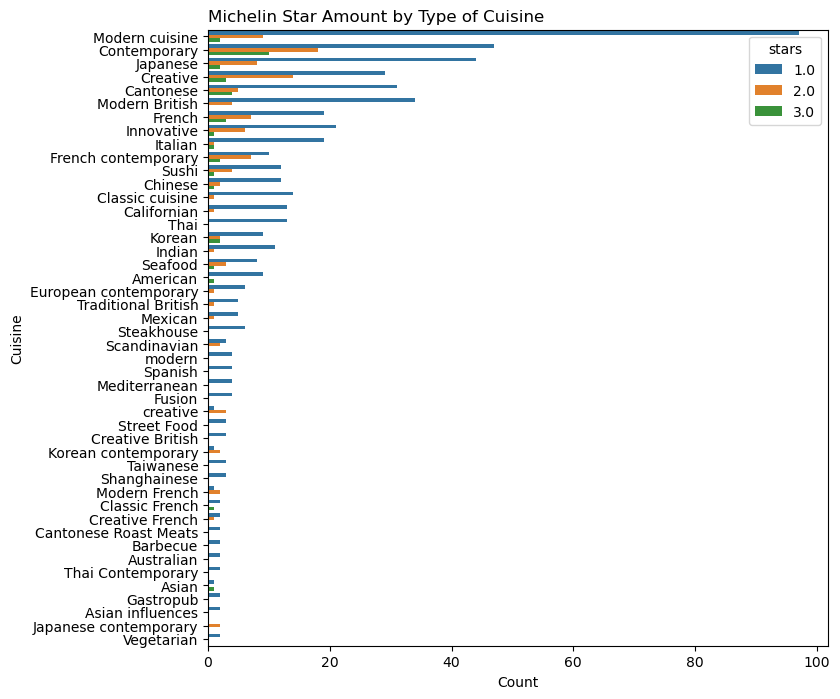

In [18]:
plt.figure(figsize=(8, 8))
cuis = sns.countplot(y = 'cuisine', hue = 'stars', 
              data = df, order = df['cuisine'].value_counts().iloc[:46].index)
cuis.set_title('Michelin Star Amount by Type of Cuisine', loc='left')
cuis.set_ylabel('Cuisine')
cuis.set_xlabel('Count')
print("Modern Cuisine is the most common cuisine. Contemporary cuisine has the most 3-starred Michelin restaurants, while Modern cuisine has the most 1-starred Michelin restaurants.")

The region with the highest avg Michelin Star rating is Macau and the region with the lowest avg Michelin Star rating is Maca


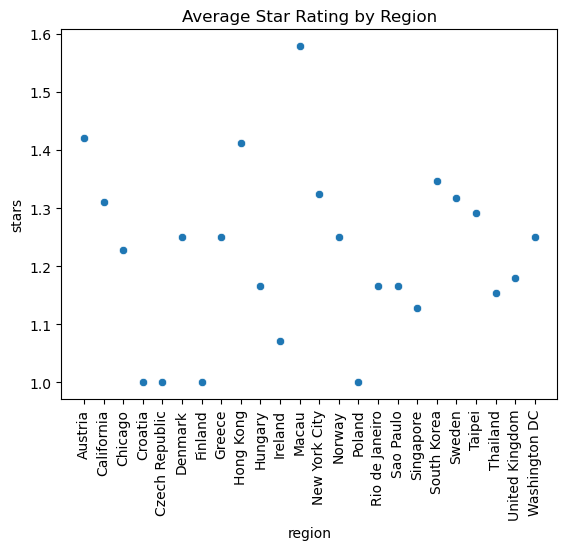

In [19]:
grouped_region = df.groupby(by="region", as_index=False)["stars"].mean()
plt.xticks(rotation=90)
sns.scatterplot(data=grouped_region, x="region", y="stars")
plt.title('Average Star Rating by Region')
print("The region with the highest avg Michelin Star rating is Macau and the region with the lowest avg Michelin Star rating is Maca")

New York has the most Michelin-starred restaurants in general. Hong Kong has the most 3-starred Michelin restaurants.


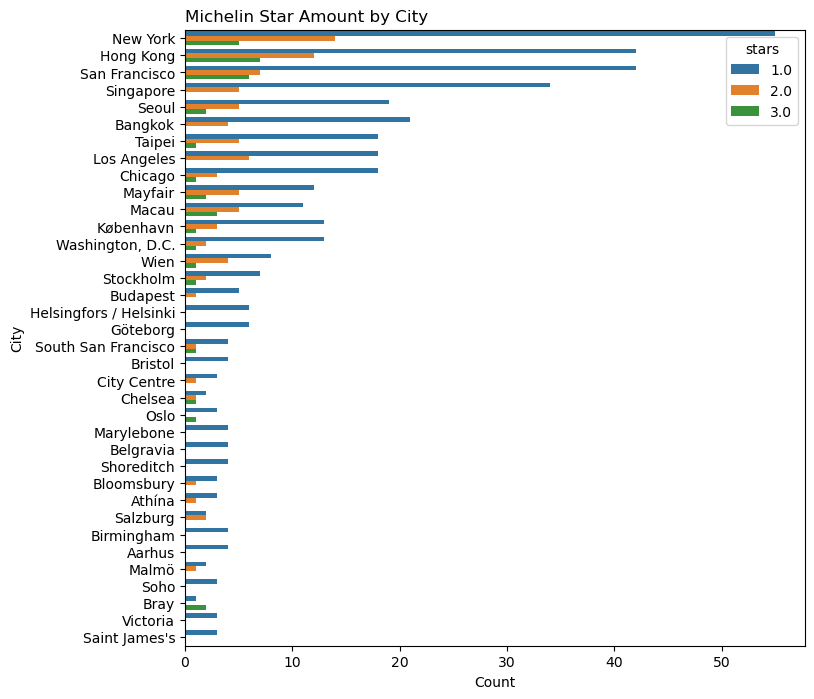

In [20]:
plt.figure(figsize=(8, 8))
cit = sns.countplot(y = 'city', hue = 'stars', 
              data = df, order = df['city'].value_counts().iloc[:36].index)
cit.set_title('Michelin Star Amount by City', loc='left')
cit.set_ylabel('City')
cit.set_xlabel('Count')
print("New York has the most Michelin-starred restaurants in general. Hong Kong has the most 3-starred Michelin restaurants.")

In [8]:
grouped_cuisine = df.groupby('cuisine', as_index=False)['stars'].mean()
print("Japanese contemporary has the highest average Michelin star rating.")
grouped_cuisine.sort_values(by="stars", ascending = False)

Japanese contemporary has the highest average Michelin star rating.


,cuisine,stars
35,Japanese contemporary,2.00
28,Hunanese and Sichuan,2.00
54,Sichuan-Huai Yang,2.00
1,Asian,2.00
68,creative,1.75
...,...,...
39,Meats and grills,1.00
40,Mediterranean,1.00
41,Mediterranean cuisine,1.00
47,Noodles and congee,1.00


In [9]:
grouped_price = df.groupby('price', as_index=False)['stars'].mean()
print("4 dollar sign restaurants had the highest average Michelin star rating.")
grouped_price.sort_values(by="stars", ascending = False)

4 dollar sign restaurants had the highest average Michelin star rating.


,price,stars
3,4.0,1.448529
4,5.0,1.383562
1,2.0,1.119048
2,3.0,1.077670
0,1.0,1.064516


In [10]:
df2 = df[["name", "latitude", "longitude", "zipCode", "stars", "city", "region", "cuisine", "price"]]
df2.head()

,name,latitude,longitude,zipCode,stars,city,region,cuisine,price
0,Kilian Stuba,47.348580,10.17114,87568,1.0,Kleinwalsertal,Austria,Creative,5.0
1,Pfefferschiff,47.837870,13.07917,5300,1.0,Hallwang,Austria,Classic cuisine,5.0
2,Esszimmer,47.806850,13.03409,5020,1.0,Salzburg,Austria,Creative,5.0
3,Carpe Diem,47.800010,13.04006,5020,1.0,Salzburg,Austria,Market cuisine,5.0
4,Edvard,48.216503,16.36852,1010,1.0,Wien,Austria,Modern cuisine,4.0


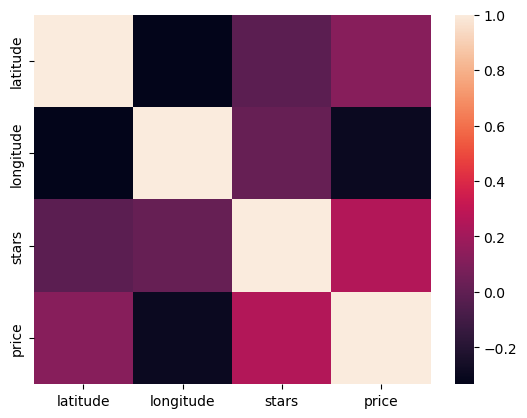

In [11]:
sns.heatmap(df2.corr());

In [12]:
print("stars correlate most with price.")

stars correlate most with price.
